In [1]:
!nvidia-smi  # Check for GPUs
!lscpu       # Check CPU info


# Detect GPU hardware
!lspci | egrep -i 'nvidia|vga|display|3d'
# Driver loaded?
!!lsmod | grep nvidia
# Torch view
!python - <<'PY'
!import torch; print("cuda_available:", torch.cuda.is_available())
!print(torch.version.cuda, torch.cuda.device_count())
!PY


Tue Aug 26 13:59:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.153.02             Driver Version: 570.153.02     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        On  |   00000000:41:00.0 Off |                  Off |
|  0%   33C    P8             30W /  480W |      18MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [22]:
import geopandas as gpd
import pandas as pd
from IPython.display import display, HTML

# Set pandas to display all columns without truncating them
pd.set_option('display.max_columns', None)

# The file path you provided (corrected)
shapefile_path = '/home/rbielski/SAL_Git_Projects/observations/main_PolygonLayer.shp'

print(f"Loading shapefile to display its header...")

try:
    # Load the shapefile
    gdf = gpd.read_file(shapefile_path)
    
    # Display basic information
    print(f"Shapefile loaded successfully. Shape: {gdf.shape}")
    
    # Convert the geodataframe to HTML with styling for scrollable display
    # Create a styled version without the geometry column (which can be very verbose)
    display_cols = [col for col in gdf.columns if col != 'geometry']
    
    # Create HTML for a scrollable table with improved formatting
    html = """
    <style>
        .dataframe-div {
            max-height: 500px;
            max-width: 100%;
            overflow: auto;
            border: 1px solid #ddd;
        }
        table.dataframe {
            border-collapse: collapse;
            width: 100%;
            font-family: Arial, sans-serif;
            color: #333333; /* Dark text color for all table content */
        }
        table.dataframe th {
            background-color: #4682b4; /* Steel blue header */
            color: white;
            position: sticky;
            top: 0;
            z-index: 10;
            box-shadow: 0 2px 2px -1px rgba(0, 0, 0, 0.4);
            padding: 10px;
            text-align: left;
            font-weight: bold;
            border: 1px solid #ddd;
        }
        table.dataframe td {
            padding: 8px;
            text-align: left;
            border: 1px solid #ddd;
            background-color: #f9f9f9; /* Light gray background for better contrast */
            color: #333333; /* Ensure text is dark on light background */
        }
        table.dataframe tr:nth-child(even) td {
            background-color: #ffffff; /* Alternating white background for even rows */
        }
        table.dataframe tr:hover td {
            background-color: #e6f7ff; /* Light blue on hover */
        }
        /* Add row numbers styling */
        table.dataframe th.row_heading {
            background-color: #4682b4;
            color: white;
            font-weight: bold;
            position: sticky;
            left: 0;
            z-index: 20;
        }
        table.dataframe td.row_heading {
            background-color: #e6e6e6;
            color: #333333;
            font-weight: bold;
            border: 1px solid #ddd;
            position: sticky;
            left: 0;
            z-index: 1;
        }
    </style>
    <div class="dataframe-div">
    """
    
    # Add the DataFrame HTML to our styled container
    # Use escape=False to properly render any HTML in the data
    html += gdf[display_cols].head(100).to_html(index=True, classes='dataframe', escape=False)
    html += "</div>"
    
    # Display the HTML
    display(HTML(html))
    
    # Print column names as a reference
    print("\nColumn Names Reference:")
    for i, col in enumerate(display_cols):
        print(f"{i+1}. {col}")
    
    # Also display a summary of the data
    print("\nSummary statistics:")
    print(f"- Number of records: {len(gdf)}")
    print(f"- Number of columns: {len(gdf.columns)}")
    print(f"- CRS: {gdf.crs}")
    
except Exception as e:
    print(f"❌ An error occurred: {e}")

Loading shapefile to display its header...
Shapefile loaded successfully. Shape: (6458, 80)


,objectid_1,reporter,RecOwner,SciName,ComName,Nativity,OccStatus,Status,ObsDate,DateEnt,DateUp,Location,Latitude,Longitude,Datum,Method,CoordAcc,DataType,Centroid,Abundance,InfestAcre,GrossAcre,Percentcov,Density,Quantity,QuantityU,APPXQuant,NumCollect,Smallest,Largest,Incidence,Severity,Host,Host_Name,HostPheno,HostDamage,ManageStat,PopStat,Habitat,LocalOwner,Site,RecBasis,Museum,MuseumRec,Voucher,ObsIDer,CollectTme,UUID,OrgSrcID,OrigName,RecSrcTyp,Surveyor,DateAcc,VisitType,DataMthd,TrapType,NumTraps,TargetName,TargetCnt,TargetRnge,Phenology,LifeStatus,Sex,PID,WaterName,WaterType,Substrate,TreatArea,PlantTreat,TreatComm,Reference,Locality,Comments,ReviewDate,Reviewer,VerifyMthd,Verified,IDCred,ReviewComm
0,5072578,National Park Service Exotic Plant Management Teams,Federal Agency,Bromus tectorum,"cheatgrass, downy brome",Introduced,Detected,Positive,09-09-16,08-15-17,03-14-18,"""Crook, Wyoming, United States""",44.59257,-104.71485,WGS84,None,0,None,None,None,0.00,0.01,3,None,0,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,DETO,None,Human Observation,None,None,None,None,0,None,{8D346EF2-8E4F-431F-B5FB-FF605CDC5618},BRTE,Bulk Data,"""NGPEPMT""",0,None,None,None,None,None,0.0,None,"""VEGETATIVE""",None,None,None,None,None,None,0.0,0,None,None,None,"""Inventory""",03-14-18,Slade Franklin,Bulk Verified,Verified,Probable,None
1,5072579,National Park Service Exotic Plant Management Teams,Federal Agency,Bromus tectorum,"cheatgrass, downy brome",Introduced,Detected,Positive,09-09-16,08-15-17,03-14-18,"""Crook, Wyoming, United States""",44.59275,-104.71472,WGS84,None,0,None,None,None,0.00,0.01,3,None,0,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,DETO,None,Human Observation,None,None,None,None,0,None,{D070F8C6-A391-40A8-8239-708FBEE5F956},BRTE,Bulk Data,"""NGPEPMT""",0,None,None,None,None,None,0.0,None,"""VEGETATIVE""",None,None,None,None,None,None,0.0,0,None,None,None,"""Inventory""",03-14-18,Slade Franklin,Bulk Verified,Verified,Probable,None
2,5072581,National Park Service Exotic Plant Management Teams,Federal Agency,Bromus tectorum,"cheatgrass, downy brome",Introduced,Detected,Positive,09-09-16,08-15-17,03-14-18,"""Crook, Wyoming, United States""",44.59312,-104.71507,WGS84,None,0,None,None,None,0.00,0.01,3,None,0,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,DETO,None,Human Observation,None,None,None,None,0,None,{4A270F8B-BAC5-40C0-8F7A-6A410E3B2A50},BRTE,Bulk Data,"""NGPEPMT""",0,None,None,None,None,None,0.0,None,"""VEGETATIVE""",None,None,None,None,None,None,0.0,0,None,None,None,"""Inventory""",03-14-18,Slade Franklin,Bulk Verified,Verified,Probable,None
3,5072582,National Park Service Exotic Plant Management Teams,Federal Agency,Bromus tectorum,"cheatgrass, downy brome",Introduced,Detected,Positive,09-09-16,08-15-17,03-14-18,"""Crook, Wyoming, United States""",44.59343,-104.71466,WGS84,None,0,None,None,None,0.00,0.01,3,None,0,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,DETO,None,Human Observation,None,None,None,None,0,None,{709D0679-7893-470A-92DC-50FC8B52C97F},BRTE,Bulk Data,"""NGPEPMT""",0,None,None,None,None,None,0.0,None,"""VEGETATIVE""",None,None,None,None,None,None,0.0,0,None,None,None,"""Inventory""",03-14-18,Slade Franklin,Bulk Verified,Verified,Probable,None
4,5072583,National Park Service Exotic Plant Management Teams,Federal Agency,Bromus tectorum,"cheatgrass, downy brome",Introduced,Detected,Positive,09-09-16,08-15-17,03-14-18,"""Crook, Wyoming, United States""",44.59376,-104.71474,WGS84,None,0,None,None,None,0.00,0.01,3,None,0,None,None,None,None,None,None,None,None,None,None,None,Unknown,None,None,DETO,None,Human Observation,None,None,None,None,0,None,{246AADCB-8FA3-41B1-B5BC-F98FE19525D5},BRTE,Bulk Data,"""NGPEPMT""",0,None,None,None,None,None,0.0,None,"""VEGETATIVE""",None,None,None,None,None,None,0.0,0,None,None,None,"""Inventory""",03-14-18,Slade Franklin,Bulk Verified,Verified,Probable,None
5,5072584


Column Names Reference:
1. objectid_1
2. reporter
3. RecOwner
4. SciName
5. ComName
6. Nativity
7. OccStatus
8. Status
9. ObsDate
10. DateEnt
11. DateUp
12. Location
13. Latitude
14. Longitude
15. Datum
16. Method
17. CoordAcc
18. DataType
19. Centroid
20. Abundance
21. InfestAcre
22. GrossAcre
23. Percentcov
24. Density
25. Quantity
26. QuantityU
27. APPXQuant
28. NumCollect
29. Smallest
30. Largest
31. Incidence
32. Severity
33. Host
34. Host_Name
35. HostPheno
36. HostDamage
37. ManageStat
38. PopStat
39. Habitat
40. LocalOwner
41. Site
42. RecBasis
43. Museum
44. MuseumRec
45. Voucher
46. ObsIDer
47. CollectTme
48. UUID
49. OrgSrcID
50. OrigName
51. RecSrcTyp
52. Surveyor
53. DateAcc
54. VisitType
55. DataMthd
56. TrapType
57. NumTraps
58. TargetName
59. TargetCnt
60. TargetRnge
61. Phenology
62. LifeStatus
63. Sex
64. PID
65. WaterName
66. WaterType
67. Substrate
68. TreatArea
69. PlantTreat
70. TreatComm
71. Reference
72. Locality
73. Comments
74. ReviewDate
75. Reviewer
76. Ver

In [ ]:
import geopandas as gpd
import pandas as pd

# Load shapefile (corrected path)
shapefile_path = '/home/rbielski/SAL_Git_Projects/observations/main_PolygonLayer.shp'
gdf = gpd.read_file(shapefile_path)

def parse_percentcov(val):
    if pd.isnull(val):
        return None
    val = str(val).replace('%', '').strip()
    if '-' in val:
        lower = val.split('-')[0]
        try:
            return float(lower)
        except ValueError:
            return None
    try:
        return float(val)
    except ValueError:
        return None

# Apply parsing to Percentcov
gdf['Percentcov_num'] = gdf['Percentcov'].apply(parse_percentcov)

# Convert InfestAcre to square meters
gdf['InfestSqM'] = gdf['InfestAcre'] * 4046.86

# Filter: Percentcov >= 75 and InfestSqM >= 900
filtered_gdf = gdf[(gdf['Percentcov_num'] >= 75) & (gdf['InfestSqM'] >= 900)]

# Print result summary
print(filtered_gdf[['Percentcov', 'Percentcov_num', 'InfestAcre', 'InfestSqM']].head())
print(f"Filtered polygons: {len(filtered_gdf)}")

    Percentcov  Percentcov_num  InfestAcre   InfestSqM
134         85            85.0        7.54  30513.3244
191         90            90.0        3.59  14528.2274
231         90            90.0        5.95  24078.8170
339       97.5            97.5        0.88   3561.2368
521         85            85.0        1.28   5179.9808
Filtered polygons: 269


Shapefile CRS: EPSG:3857
Shapefile Shape: (6458, 80)
Columns: ['objectid_1', 'reporter', 'RecOwner', 'SciName', 'ComName', 'Nativity', 'OccStatus', 'Status', 'ObsDate', 'DateEnt', 'DateUp', 'Location', 'Latitude', 'Longitude', 'Datum', 'Method', 'CoordAcc', 'DataType', 'Centroid', 'Abundance', 'InfestAcre', 'GrossAcre', 'Percentcov', 'Density', 'Quantity', 'QuantityU', 'APPXQuant', 'NumCollect', 'Smallest', 'Largest', 'Incidence', 'Severity', 'Host', 'Host_Name', 'HostPheno', 'HostDamage', 'ManageStat', 'PopStat', 'Habitat', 'LocalOwner', 'Site', 'RecBasis', 'Museum', 'MuseumRec', 'Voucher', 'ObsIDer', 'CollectTme', 'UUID', 'OrgSrcID', 'OrigName', 'RecSrcTyp', 'Surveyor', 'DateAcc', 'VisitType', 'DataMthd', 'TrapType', 'NumTraps', 'TargetName', 'TargetCnt', 'TargetRnge', 'Phenology', 'LifeStatus', 'Sex', 'PID', 'WaterName', 'WaterType', 'Substrate', 'TreatArea', 'PlantTreat', 'TreatComm', 'Reference', 'Locality', 'Comments', 'ReviewDate', 'Reviewer', 'VerifyMthd', 'Verified', 'IDCred',

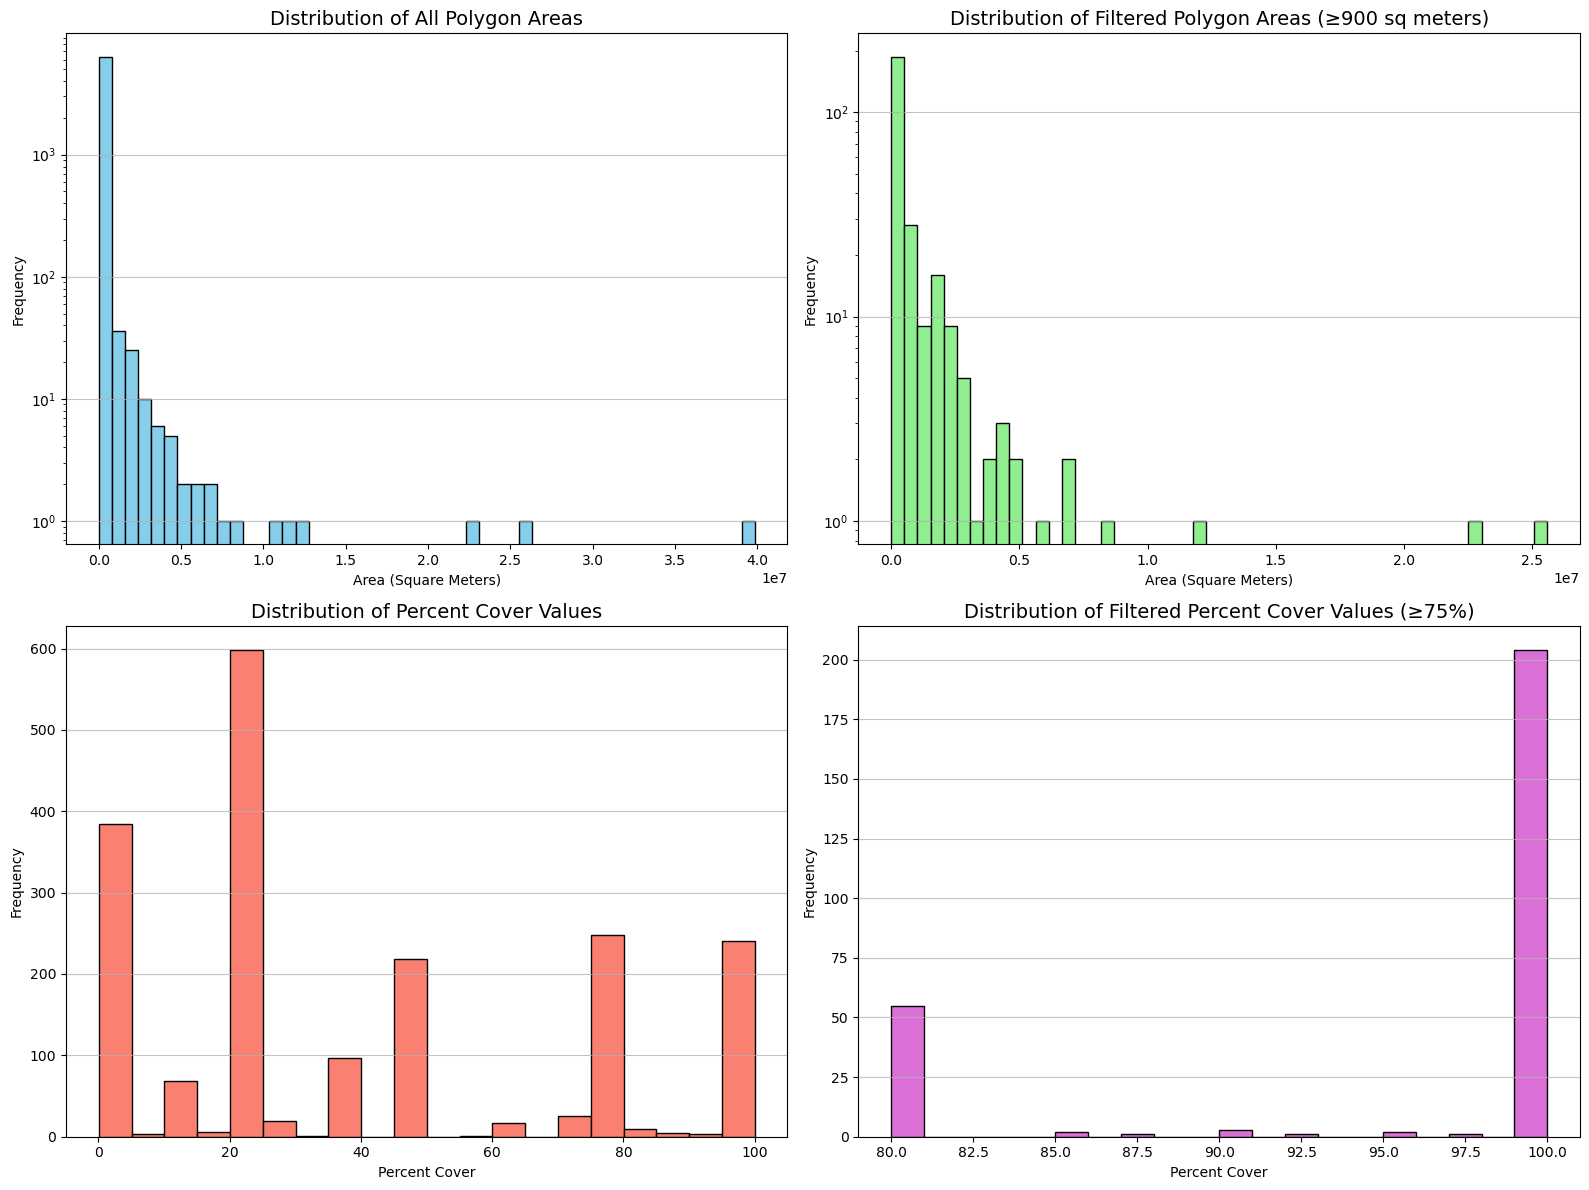

Original filtered polygons: 269
After removing empty geometries: 269
Found 269 invalid geometries.
Attempted to fix invalid geometries.
Using 269 records with existing Latitude/Longitude columns
Creating map with 269 points


/tmp/ipykernel_37595/598826134.py:242: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Map displayed successfully.
Saved 269 filtered polygons to filtered_cheatgrass.shp
Saved 269 filtered polygons to filtered_cheatgrass.geojson (with original column names)


In [19]:
# --- BLOCK 1: EXPLORATORY DATA ANALYSIS ---
# Purpose: Load the cheatgrass data and analyze its structure and distributions

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings

# Set pandas to display all columns without truncating them
pd.set_option('display.max_columns', None)

# Load the shapefile (corrected path)
shapefile_path = '/home/rbielski/SAL_Git_Projects/observations/main_PolygonLayer.shp'
gdf = gpd.read_file(shapefile_path)

print("Shapefile CRS:", gdf.crs)
print("Shapefile Shape:", gdf.shape)
print("Columns:", gdf.columns.tolist())

# Print the first few rows to understand the structure
print("\nFirst few rows of the dataset:")
print(gdf.head())

# Check for missing values
print("\nMissing values per column:")
print(gdf.isnull().sum())

# Define function to parse percentage cover values
def parse_percentcov(val):
    if pd.isnull(val):
        return None
    val = str(val).replace('%', '').strip()
    if '-' in val:
        # For ranges like '10-25%', take the lower bound
        lower = val.split('-')[0]
        try:
            return float(lower)
        except ValueError:
            return None
    try:
        return float(val)
    except ValueError:
        return None

# Apply parsing to Percentcov
gdf['Percentcov_num'] = gdf['Percentcov'].apply(parse_percentcov)

# Convert InfestAcre to square meters
gdf['InfestSqM'] = gdf['InfestAcre'] * 4046.86

# Get summary statistics for numeric columns
print("\nSummary statistics for InfestAcre and InfestSqM:")
print(gdf[['InfestAcre', 'InfestSqM']].describe())

print("\nSummary statistics for Percentcov_num (parsed percentage):")
print(gdf['Percentcov_num'].describe())

# Check the value counts for the SciName column (equivalent to Species)
print("\nSpecies distribution (SciName column):")
print(gdf['SciName'].value_counts())

# Filter data: Percentcov >= 75 and InfestSqM >= 900 (similar to VEDU filtering criteria)
filtered_gdf = gdf[(gdf['Percentcov_num'] >= 75) & (gdf['InfestSqM'] >= 900)]

print(f"\nAfter filtering (Percentcov >= 75% and InfestSqM >= 900 sq meters):")
print(f"Number of polygons: {len(filtered_gdf)} (from original {len(gdf)})")

# Create plots to visualize the distributions
fig = plt.figure(figsize=(16, 12))

# Plot 1: Distribution of Infestation Areas
ax1 = fig.add_subplot(221)
ax1.hist(gdf['InfestSqM'], bins=50, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of All Polygon Areas', fontsize=14)
ax1.set_xlabel('Area (Square Meters)')
ax1.set_ylabel('Frequency')
ax1.set_yscale('log')
ax1.grid(axis='y', alpha=0.75)

# Plot 2: Distribution of Infestation Areas (filtered)
ax2 = fig.add_subplot(222)
ax2.hist(filtered_gdf['InfestSqM'], bins=50, color='lightgreen', edgecolor='black')
ax2.set_title('Distribution of Filtered Polygon Areas (≥900 sq meters)', fontsize=14)
ax2.set_xlabel('Area (Square Meters)')
ax2.set_ylabel('Frequency')
ax2.set_yscale('log')
ax2.grid(axis='y', alpha=0.75)

# Plot 3: Distribution of Percentcov values
ax3 = fig.add_subplot(223)
ax3.hist(gdf['Percentcov_num'].dropna(), bins=20, color='salmon', edgecolor='black')
ax3.set_title('Distribution of Percent Cover Values', fontsize=14)
ax3.set_xlabel('Percent Cover')
ax3.set_ylabel('Frequency')
ax3.grid(axis='y', alpha=0.75)

# Plot 4: Distribution of Percentcov values (filtered)
ax4 = fig.add_subplot(224)
ax4.hist(filtered_gdf['Percentcov_num'].dropna(), bins=20, color='orchid', edgecolor='black')
ax4.set_title('Distribution of Filtered Percent Cover Values (≥75%)', fontsize=14)
ax4.set_xlabel('Percent Cover')
ax4.set_ylabel('Frequency')
ax4.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

# Create an interactive map with Plotly
if len(filtered_gdf) > 0:
    # Check if we have valid geometry
    # Filter out empty geometries and check geometry validity
    print(f"Original filtered polygons: {len(filtered_gdf)}")
    filtered_gdf = filtered_gdf[~filtered_gdf.geometry.is_empty]
    print(f"After removing empty geometries: {len(filtered_gdf)}")
    
    # Check for geometries with issues
    invalid_geoms = filtered_gdf[~filtered_gdf.geometry.is_valid]
    if not invalid_geoms.empty:
        print(f"Found {len(invalid_geoms)} invalid geometries.")
        # Try to fix invalid geometries
        filtered_gdf.geometry = filtered_gdf.geometry.buffer(0)
        print("Attempted to fix invalid geometries.")
    
    if len(filtered_gdf) == 0:
        print("No valid geometries found in the filtered data.")
    else:
        # Extract Latitude and Longitude directly from the data if available
        use_existing_coords = False
        if 'Latitude' in filtered_gdf.columns and 'Longitude' in filtered_gdf.columns:
            # Check if we have valid coordinate data
            valid_coords = filtered_gdf.dropna(subset=['Latitude', 'Longitude'])
            if len(valid_coords) > 0:
                print(f"Using {len(valid_coords)} records with existing Latitude/Longitude columns")
                filtered_gdf_with_coords = valid_coords.copy()
                filtered_gdf_with_coords['lon'] = filtered_gdf_with_coords['Longitude'].astype(float)
                filtered_gdf_with_coords['lat'] = filtered_gdf_with_coords['Latitude'].astype(float)
                use_existing_coords = True
        
        if not use_existing_coords:
            # Verify the CRS of the original data
            if gdf.crs is None:
                print("Warning: Original data has no CRS information. Assuming EPSG:4326 (WGS84).")
                filtered_gdf.set_crs('EPSG:4326', inplace=True)
            
            # Print the first few geometry objects to inspect them
            print("\nSample geometries:")
            for i, geom in enumerate(filtered_gdf.geometry.head(3)):
                print(f"Geometry {i+1}:", geom)
            
            # Reproject to WGS84 for plotting on a map
            try:
                filtered_gdf_wgs84 = filtered_gdf.to_crs('EPSG:4326')
                print("Successfully reprojected to WGS84.")
            except Exception as e:
                print(f"Error during reprojection to WGS84: {e}")
                # If reprojection fails, try to use the original CRS
                filtered_gdf_wgs84 = filtered_gdf.copy()
                print("Using original CRS instead.")
            
            # Check if we have valid bounds
            print("\nChecking bounds of reprojected data:")
            print(filtered_gdf_wgs84.bounds.head())
            
            # Check for NaN values in bounds
            nan_bounds = filtered_gdf_wgs84.bounds.isnull().any(axis=1)
            if nan_bounds.any():
                print(f"Warning: {nan_bounds.sum()} geometries have NaN bounds.")
                # Remove rows with NaN bounds
                filtered_gdf_wgs84 = filtered_gdf_wgs84[~nan_bounds]
                print(f"Remaining geometries after removing NaN bounds: {len(filtered_gdf_wgs84)}")
            
            if filtered_gdf_wgs84.empty:
                print("No valid geometries with bounds found.")
            else:
                # Determine appropriate UTM zone based on average longitude
                valid_bounds = filtered_gdf_wgs84.bounds.dropna(subset=['minx'])
                
                if valid_bounds.empty:
                    print("No valid longitude values found in the data.")
                    # Use a default UTM zone (e.g., for North America)
                    utm_zone = 11  # Default to UTM zone 11 (western US)
                else:
                    # Calculate average longitude from valid values only
                    avg_lon = valid_bounds['minx'].mean()
                    # Calculate UTM zone safely
                    utm_zone = int(((avg_lon + 180) % 360) // 6) + 1
                
                print(f"Using UTM zone: {utm_zone}")
                utm_crs = f'EPSG:326{utm_zone}'  # Northern hemisphere
                
                try:
                    # Project to UTM for accurate centroid calculation
                    filtered_gdf_utm = filtered_gdf_wgs84.to_crs(utm_crs)
                    print(f"Successfully projected to {utm_crs}")
                    
                    # Calculate centroids in the projected CRS
                    with warnings.catch_warnings():
                        warnings.simplefilter("ignore")
                        centroids_utm = filtered_gdf_utm.geometry.centroid
                    
                    # Convert centroids back to WGS84
                    centroids_wgs84 = gpd.GeoSeries(centroids_utm, crs=utm_crs).to_crs('EPSG:4326')
                    
                    # Extract coordinates
                    filtered_gdf_wgs84['lon'] = centroids_wgs84.x
                    filtered_gdf_wgs84['lat'] = centroids_wgs84.y
                    
                    # Check for NaN in coordinates
                    nan_coords = filtered_gdf_wgs84[filtered_gdf_wgs84['lon'].isnull() | filtered_gdf_wgs84['lat'].isnull()]
                    if not nan_coords.empty:
                        print(f"Warning: {len(nan_coords)} geometries have NaN coordinates after centroid calculation.")
                    
                    # Drop any rows with NaN coordinates before plotting
                    filtered_gdf_wgs84 = filtered_gdf_wgs84.dropna(subset=['lon', 'lat'])
                    print(f"Final geometries with valid coordinates: {len(filtered_gdf_wgs84)}")
                    
                    filtered_gdf_with_coords = filtered_gdf_wgs84
                except Exception as e:
                    print(f"Error during coordinate calculation: {e}")
                    filtered_gdf_with_coords = None
        
        # Now plot the map with the coordinates (either from attributes or calculated)
        if filtered_gdf_with_coords is not None and not filtered_gdf_with_coords.empty:
            # Check that longitude and latitude are within reasonable bounds
            valid_coords = filtered_gdf_with_coords[
                (filtered_gdf_with_coords['lon'] >= -180) & 
                (filtered_gdf_with_coords['lon'] <= 180) &
                (filtered_gdf_with_coords['lat'] >= -90) & 
                (filtered_gdf_with_coords['lat'] <= 90)
            ]
            
            if len(valid_coords) < len(filtered_gdf_with_coords):
                print(f"Removed {len(filtered_gdf_with_coords) - len(valid_coords)} records with coordinates outside valid range.")
            
            if not valid_coords.empty:
                print(f"Creating map with {len(valid_coords)} points")
                try:
                    # Create Plotly scatter_map
                    fig = px.scatter_mapbox(
                        valid_coords,
                        lat='lat',
                        lon='lon',
                        color='Percentcov_num',
                        size='InfestSqM',
                        size_max=15,
                        zoom=5,
                        opacity=0.7,
                        title='Cheatgrass Infestation Locations',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        hover_data=['SciName', 'Percentcov', 'InfestAcre']
                    )
                    
                    fig.update_layout(
                        mapbox_style="open-street-map",
                        margin={"r": 0, "t": 30, "l": 0, "b": 0},
                        height=600
                    )
                    
                    fig.show()
                    print("Map displayed successfully.")
                except Exception as e:
                    print(f"Error creating or displaying map: {e}")
                    
                    # Try an alternative mapping approach if the first one fails
                    try:
                        print("Attempting alternative map display...")
                        # Create a simple matplotlib plot as a fallback
                        plt.figure(figsize=(10, 8))
                        plt.scatter(valid_coords['lon'], valid_coords['lat'], 
                                   c=valid_coords['Percentcov_num'], 
                                   s=valid_coords['InfestSqM'] / 1000,  # Scale down for better visualization
                                   alpha=0.7, cmap='viridis')
                        plt.colorbar(label='Percent Cover')
                        plt.title('Cheatgrass Infestation Locations (Fallback Map)')
                        plt.xlabel('Longitude')
                        plt.ylabel('Latitude')
                        plt.grid(True)
                        plt.show()
                    except Exception as e2:
                        print(f"Alternative mapping also failed: {e2}")
            else:
                print("No valid coordinates for mapping.")
        else:
            print("No data available for mapping.")
else:
    print("No filtered data to display on map")

# Store the filtered GeoDataFrame for further processing
if len(filtered_gdf) > 0:
    # Create a copy with shorter column names to avoid warnings with shapefile format
    filtered_save = filtered_gdf.copy()
    
    # Rename longer column names (if they exist) to be ≤ 10 characters for shapefile compatibility
    long_col_renames = {
        'Percentcov_num': 'PercentNum',
        'InfestSqM': 'InfSqM'
    }
    
    filtered_save = filtered_save.rename(columns={col: new_col for col, new_col in long_col_renames.items() 
                                               if col in filtered_save.columns})
    
    # Check if any remaining column names are too long
    too_long_cols = [col for col in filtered_save.columns if len(col) > 10 and col != 'geometry']
    if too_long_cols:
        print(f"Warning: The following columns are still too long for shapefile format: {too_long_cols}")
        print("These will be automatically truncated by the shapefile writer.")
    
    # Save to both shapefile and GeoJSON formats
    try:
        # Save to shapefile
        filtered_save.to_file('/home/rbielski/SAL_Git_Projects/Cheatgrass/filtered_cheatgrass.shp')
        print(f"Saved {len(filtered_save)} filtered polygons to filtered_cheatgrass.shp")
        
        # Also save to GeoJSON (which doesn't have the column name length limitation)
        filtered_gdf.to_file('/home/rbielski/SAL_Git_Projects/Cheatgrass/filtered_cheatgrass.geojson', driver='GeoJSON')
        print(f"Saved {len(filtered_gdf)} filtered polygons to filtered_cheatgrass.geojson (with original column names)")
    except Exception as e:
        print(f"Error saving data: {e}")
else:
    print("No data to save")

In [23]:
# Display the column names and their data types
print("Column names in the shapefile:")
print(gdf.columns.tolist())
print("\nData types:")
print(gdf.dtypes)

Column names in the shapefile:
['objectid_1', 'reporter', 'RecOwner', 'SciName', 'ComName', 'Nativity', 'OccStatus', 'Status', 'ObsDate', 'DateEnt', 'DateUp', 'Location', 'Latitude', 'Longitude', 'Datum', 'Method', 'CoordAcc', 'DataType', 'Centroid', 'Abundance', 'InfestAcre', 'GrossAcre', 'Percentcov', 'Density', 'Quantity', 'QuantityU', 'APPXQuant', 'NumCollect', 'Smallest', 'Largest', 'Incidence', 'Severity', 'Host', 'Host_Name', 'HostPheno', 'HostDamage', 'ManageStat', 'PopStat', 'Habitat', 'LocalOwner', 'Site', 'RecBasis', 'Museum', 'MuseumRec', 'Voucher', 'ObsIDer', 'CollectTme', 'UUID', 'OrgSrcID', 'OrigName', 'RecSrcTyp', 'Surveyor', 'DateAcc', 'VisitType', 'DataMthd', 'TrapType', 'NumTraps', 'TargetName', 'TargetCnt', 'TargetRnge', 'Phenology', 'LifeStatus', 'Sex', 'PID', 'WaterName', 'WaterType', 'Substrate', 'TreatArea', 'PlantTreat', 'TreatComm', 'Reference', 'Locality', 'Comments', 'ReviewDate', 'Reviewer', 'VerifyMthd', 'Verified', 'IDCred', 'ReviewComm', 'geometry']

Dat